In [51]:
#intalando paquetes 
# %pip install pandas
# %pip install seaborn


In [52]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Cargamos los datos

In [53]:
db = pd.read_csv("pima-indians-diabetes.csv", low_memory=False, na_values=['', ' ', 'NA', 'N/A', '-'])

Revisamos las primeras filas

In [54]:
db.head(10)

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,1,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


Podemos observar que no se dispone de un nombre de columna para facilitar el tratamiento del dataset por ello utilizaremos los siguientes atributos brindados en la información para colocar un nombre a nuestras columnas, tampoco podemos establecer el header en la fila 0

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable 

Usamos el prámetro 'names' para agregar el nombre de colummnas

In [55]:
column_names =[ 'timesPregnant','glucose','preasure','thickness','insulin','mass','pedigree','age','clase']
db = pd.read_csv("pima-indians-diabetes.csv", names = column_names, low_memory=False)


También podemos hacerlo de la siguiente forma

In [56]:
db.columns = [ 'timesPregnant','glucose','preasure','thickness','insulin','mass','pedigree','age','clase']

Ahora comprobamos que ya lo tenemos mas organizados

In [57]:
db.head(10)

,timesPregnant,glucose,preasure,thickness,insulin,mass,pedigree,age,clase
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,1,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Comprobamos la dimensión del Dataframe

In [58]:
db.shape

(768, 9)

Comprobamos la información del Dataframe

In [59]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timesPregnant  768 non-null    int64  
 1   glucose        768 non-null    int64  
 2   preasure       768 non-null    int64  
 3   thickness      768 non-null    int64  
 4   insulin        768 non-null    int64  
 5   mass           768 non-null    float64
 6   pedigree       768 non-null    float64
 7   age            768 non-null    int64  
 8   clase          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Comprobamos valores faltantes, tambión podemos graficar para obtener una solución mas visual

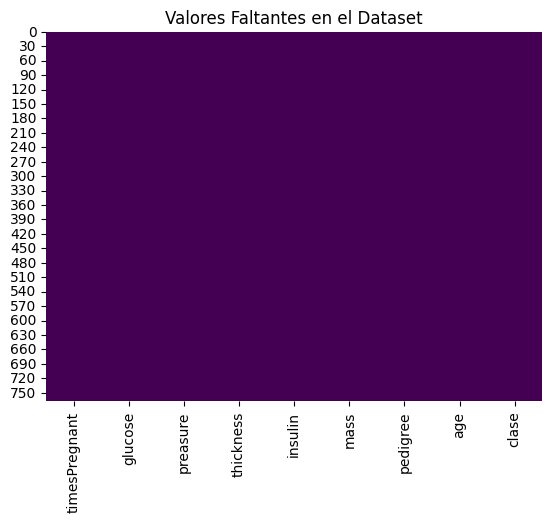

In [60]:
db.isnull().sum()

sns.heatmap(db.isna(), cbar=False, cmap='viridis')
plt.title('Valores Faltantes en el Dataset')
plt.show()

# Análiis univariado

In [61]:
db.describe()

,timesPregnant,glucose,preasure,thickness,insulin,mass,pedigree,age,clase
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.201823,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.817369,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,1.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


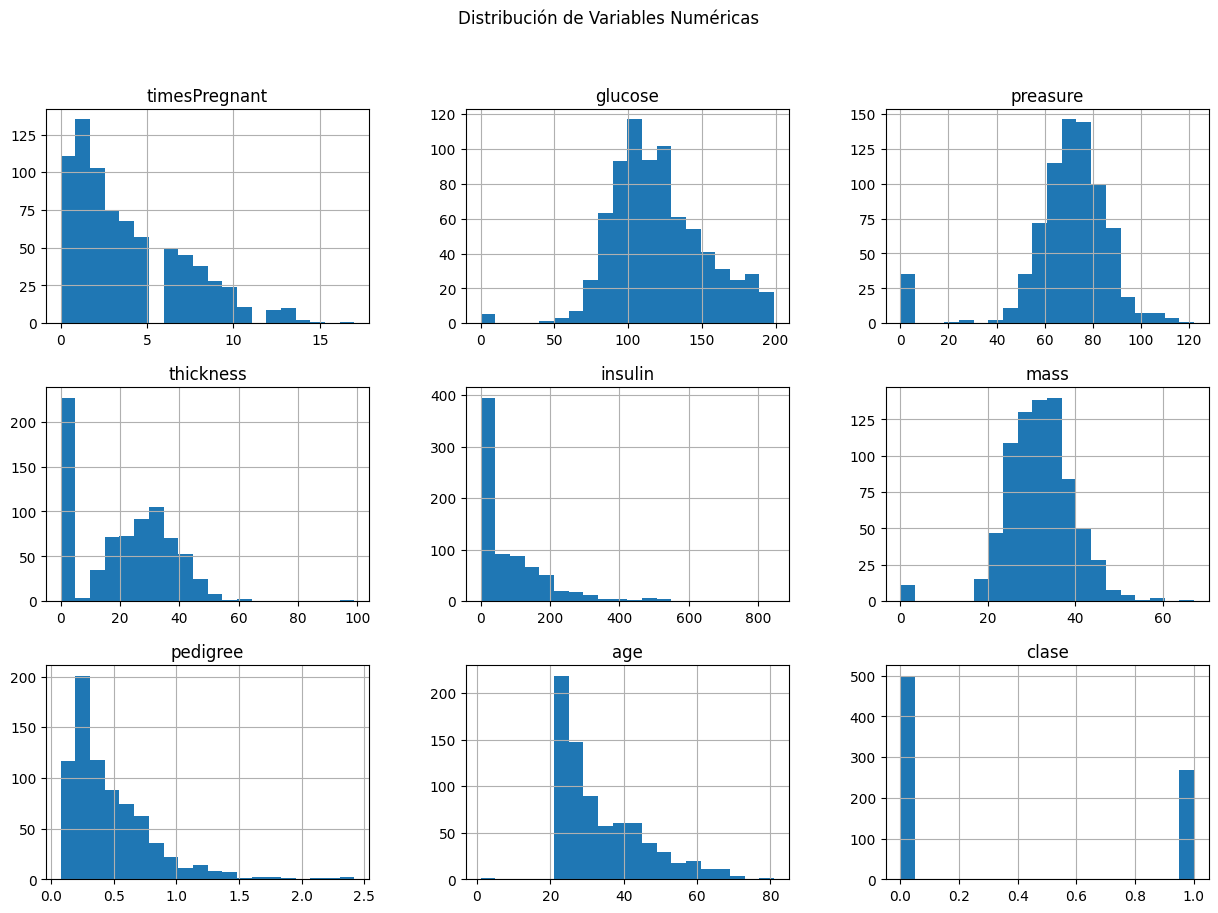

In [62]:
db.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribución de Variables Numéricas')
plt.show()

En el caso de la distribución de clase donde 1 es positivo para diabetes y 0 para negativo, graficamos de forma particular a continuación

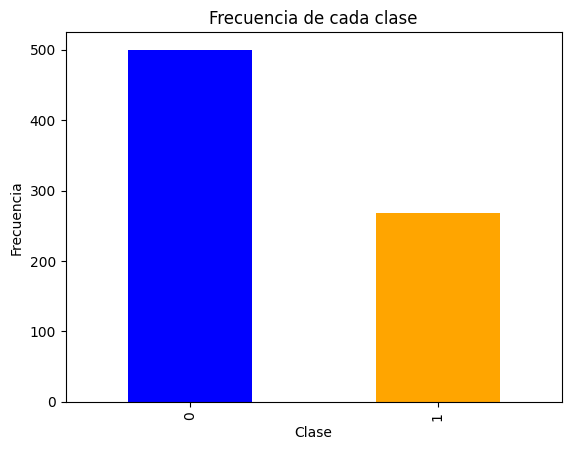

In [63]:
counts = db['clase'].value_counts()

# Graficar las frecuencias
counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de cada clase')
plt.show()

Una mejor manera de visualizar los datos sería en un tipo de gráfico circular. Al observar notamos que el 34,9% obtuvo un análisis positivo

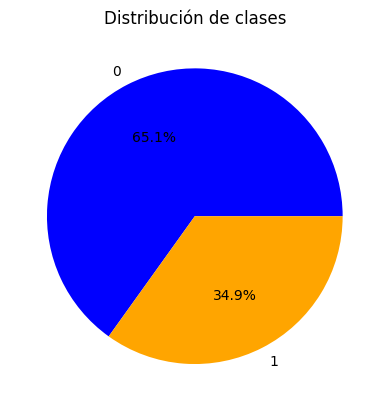

In [64]:
counts = db['clase'].value_counts()

# Graficar un pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Distribución de clases')
plt.show()

Usando Boxplots relacionamos la variables con la variable de clase

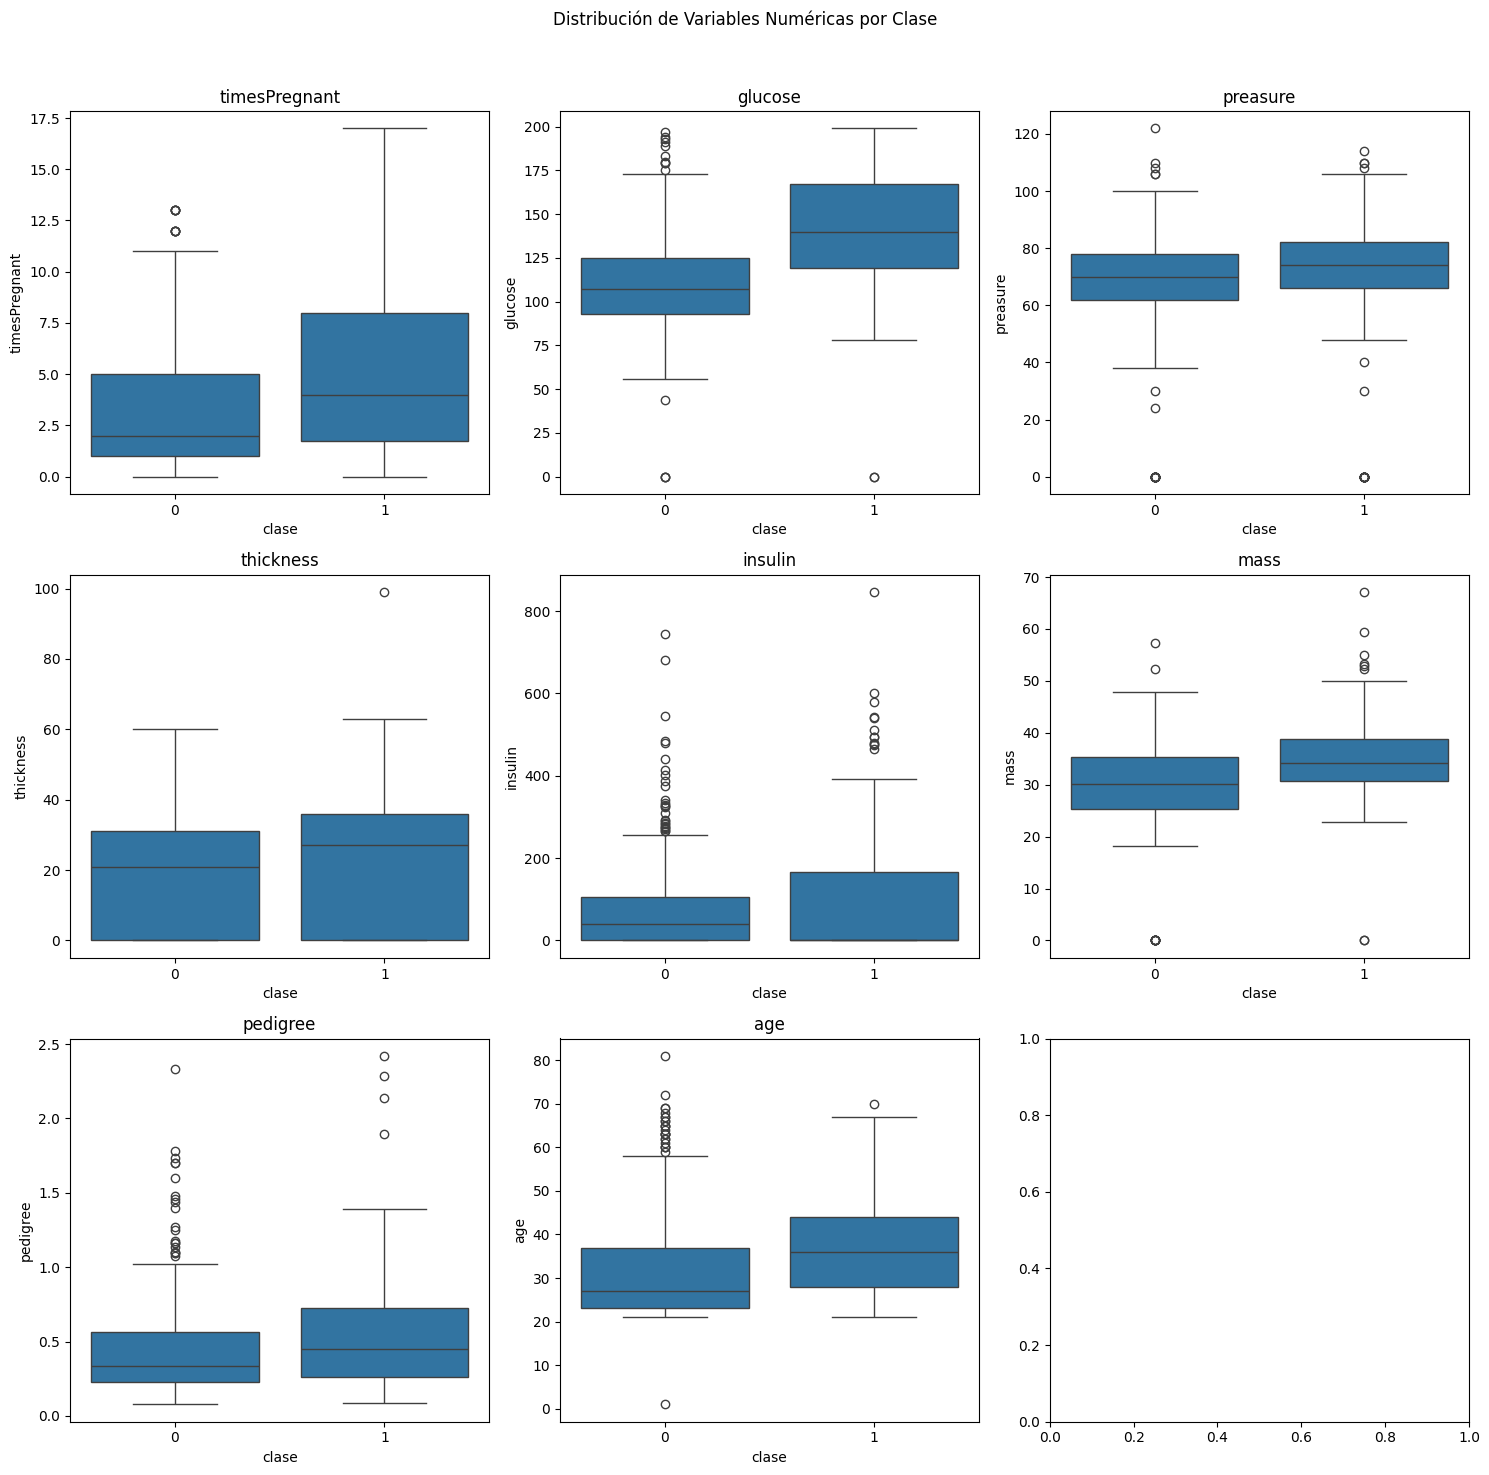

In [65]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Distribución de Variables Numéricas por Clase')

variables = db.columns[:-1] 
for var, ax in zip(variables, axes.flatten()):
    sns.boxplot(x='clase', y=var, data=db, ax=ax)
    ax.set_title(var)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


También podemos hallar la distribución de la edad

c:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


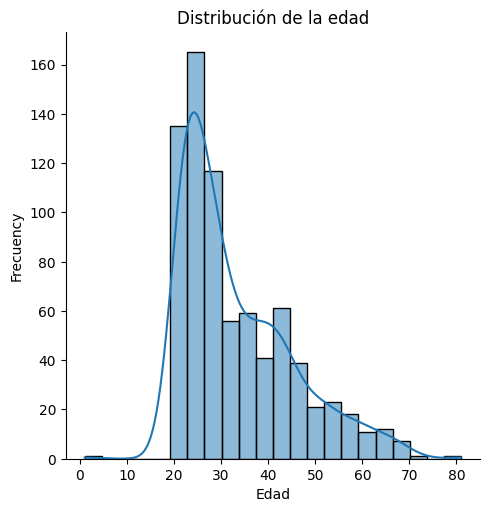

In [66]:
sns.displot(db['age'], kde = True)
plt.xlabel('Edad')
plt.ylabel('Frecuency')
plt.title('Distribución de la edad')
plt.show()

c:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


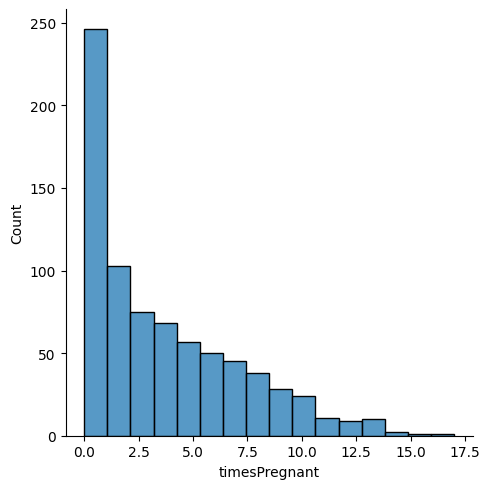

In [67]:
sns.displot(db['timesPregnant'])

## Analisis bivariado y multivariado

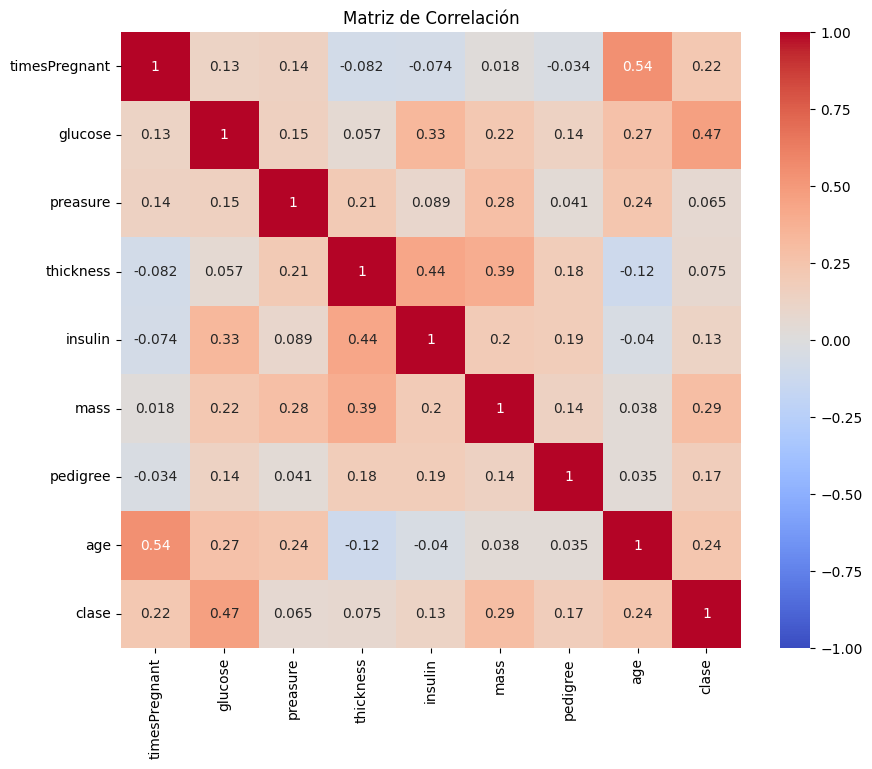

In [68]:
# Matriz de correlación
corr = db.corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

Podemos observar que hay una gran relación entre la edad y el número de embarazos


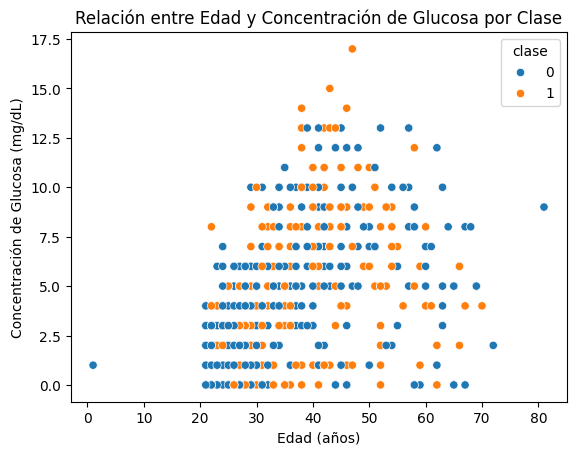

In [69]:
sns.scatterplot(x='age', y='timesPregnant', hue='clase', data=db)
plt.title('Relación entre Edad y Concentración de Glucosa por Clase')
plt.xlabel('Edad (años)')
plt.ylabel('Concentración de Glucosa (mg/dL)')
plt.show()

Con Scatter plot visualizamos una relación entre Edad y Concentración de Glucosa por Clase

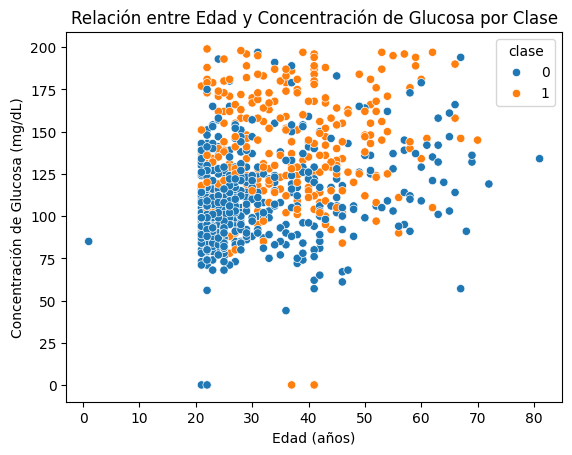

In [70]:
sns.scatterplot(x='age', y='glucose', hue='clase', data=db)
plt.title('Relación entre Edad y Concentración de Glucosa por Clase')
plt.xlabel('Edad (años)')
plt.ylabel('Concentración de Glucosa (mg/dL)')
plt.show()

Podemos visualizar la distribución pedigrí de diabetes por clase

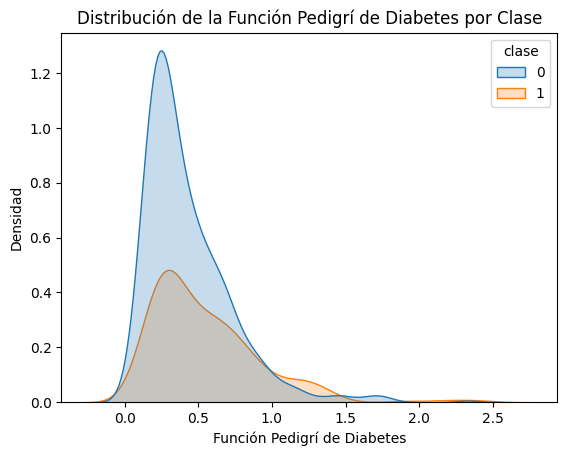

In [73]:
sns.kdeplot(data=db, x='pedigree', hue='clase', fill=True)
plt.title('Distribución de la Función Pedigrí de Diabetes por Clase')
plt.xlabel('Función Pedigrí de Diabetes')
plt.ylabel('Densidad')
plt.show()

## Pair Plot

KeyError: 'edad'

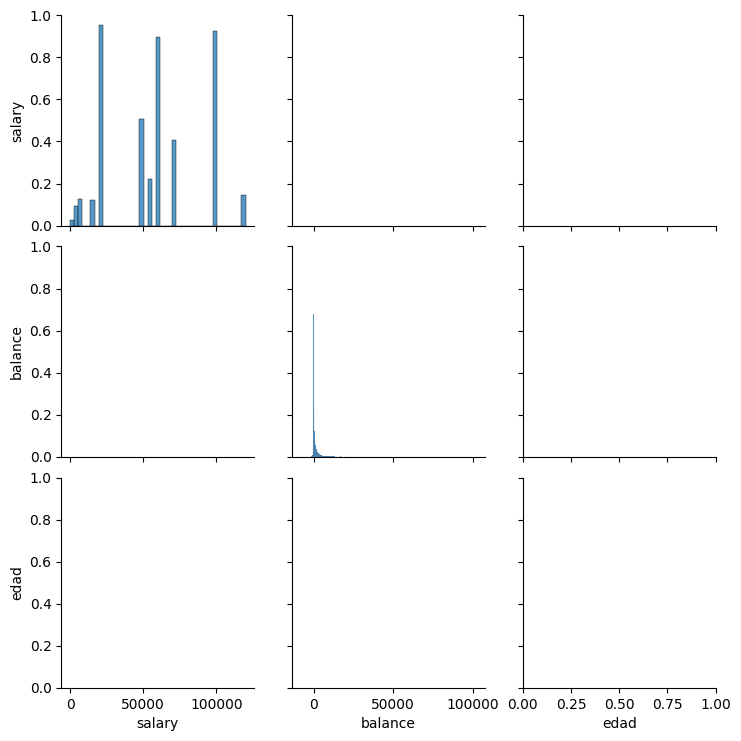

In [ ]:
sns.pairplot(data = db, vars = ['salary', 'balance', 'edad'])
plt.show()

## QQ - Plot

Es un método grafico para el diagnostico de diferencias entre la distribucion de probabilidad de una poblacion que se ha extraido una muestra aleatoria y una distribucion  usada para la comparacion

In [ ]:
# %pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


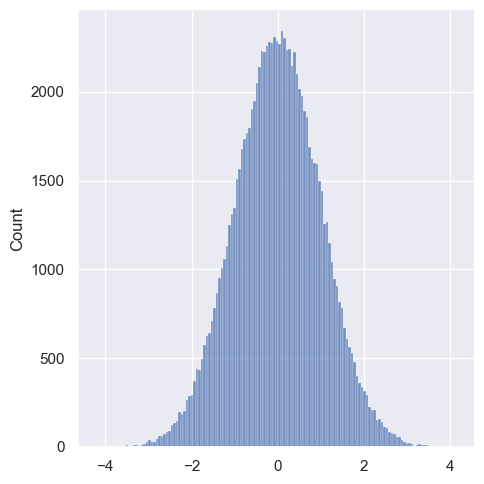

In [ ]:
import scipy.stats as stats
iris = sns.load_dataset('iris')

rvs = stats.norm(loc =0, scale =1)
normal_sample = rvs.rvs(size = 100000)
sns.set()
sns.displot(normal_sample)

In [ ]:
normal_sample = rvs.rvs(size=100000)
stats.probplot(normal_sample, dist='norm')

# Matriz de correlación
Es un gráfico que nos permite identificar las relaciones entre mas de una variable de forma sintetica

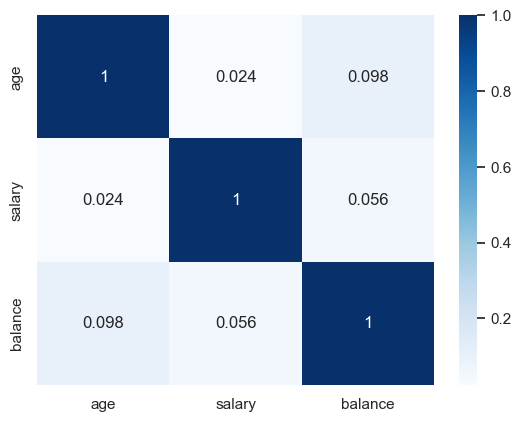

In [ ]:
sns.heatmap(db[['age','salary','balance']].corr(), annot=True, cmap = 'Blues')
plt.show()

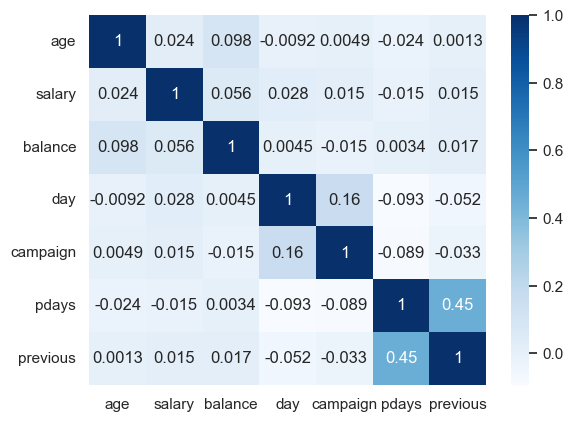

In [ ]:
numerica_sf = db.select_dtypes(include =['number'])
sns.heatmap(numerica_sf.corr(), annot=True, cmap = 'Blues')
plt.show()

# Variables categóricas numéricas
Normalmente se analizan con base a su media, mediana y un instrumento muy utilizado es el bloxpot

In [ ]:
db.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [ ]:
db.groupby('response')['salary'].median()


response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

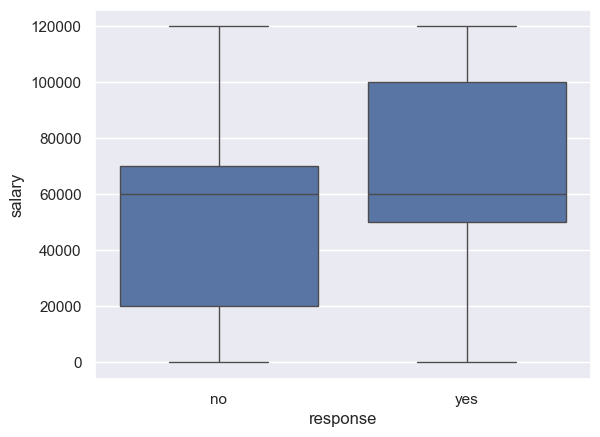

In [ ]:
sns.boxplot (x=db.response, y=db.salary)
plt.show()

# Abalisis de variables categóricas
Queremos analizar como diferentes variables categóricas (education) tienen impacto en la variable independiente.
Para hacer esto necesitamos convertir response en una varible binaria

In [ ]:
db['response_rate'] = np.where(db.response =='yes', 1,0)
db.response_rate.value_counts()

response_rate
0    39906
1     5285
Name: count, dtype: int64

Analizando ahora como se distribuye frente a distintos valores de variable categórica, tenemos:

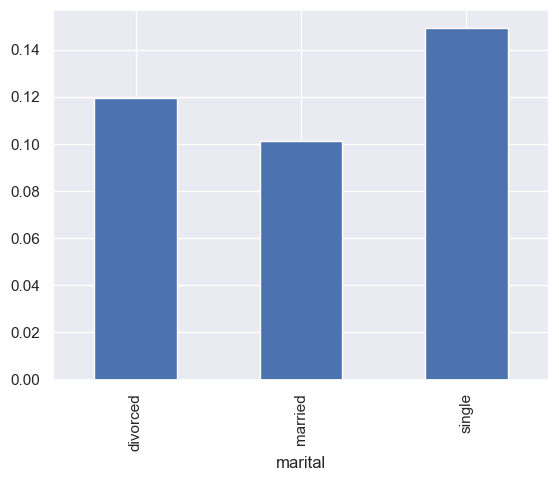

In [ ]:
db.groupby('marital')['response_rate'].mean().plot.bar()
plt.show()

# Analisis multivariable
Como ejmeplo vamos a crear una tabla pivot con las columnas dde los diferentes estados civiles

In [ ]:
result = pd.pivot_table(data = db, index = 'education', columns ='marital', values ='response_rate')
result

marital,divorced,married,single
education,,,
primary,0.138667,0.075515,0.106808
secondary,0.103485,0.094595,0.129213
tertiary,0.137415,0.129761,0.183546
unknown,0.142012,0.122414,0.162879


In [ ]:
sns.heatmap(result, annot = True, cmap='RdY1Gn', center=0.117)
plt.show()

KeyError: "'RdY1Gn' is not a known colormap name"